##DECISION TREE

####Data Preparation:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel(r"/content/heart_disease.xlsx",sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


####Exploratory Data Analysis(EDA):


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
df= df.dropna()

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,53.425532,132.449173,202.652482,137.167849,0.891253,0.979905
std,9.099243,19.243667,111.654072,25.608434,1.093875,1.128783
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,269.750000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
#hecking for outliers

from scipy import stats

numerical_columns = df.select_dtypes(include=['int64','float64'])

z_scores = stats.zscore(numerical_columns)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores >3).all(axis=1)
print(f"Number of outlier rows:{outliers.sum()}")

Number of outlier rows:0


In [ ]:
# Checking for inconsistency
categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns.columns:
  print(f"{column}unique values:")
  print(df[column].unique())

sexunique values:
['Male' 'Female']
cpunique values:
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
restecgunique values:
['lv hypertrophy' 'normal' 'st-t abnormality']
exangunique values:
[False True 'FALSE']
slopeunique values:
['downsloping' 'flat' 'upsloping']
thalunique values:
['fixed defect' 'normal' 'reversable defect']


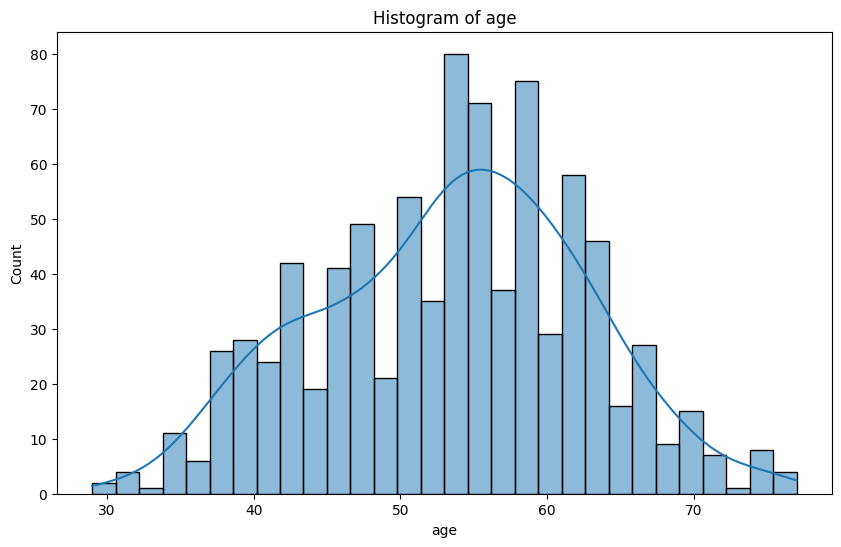

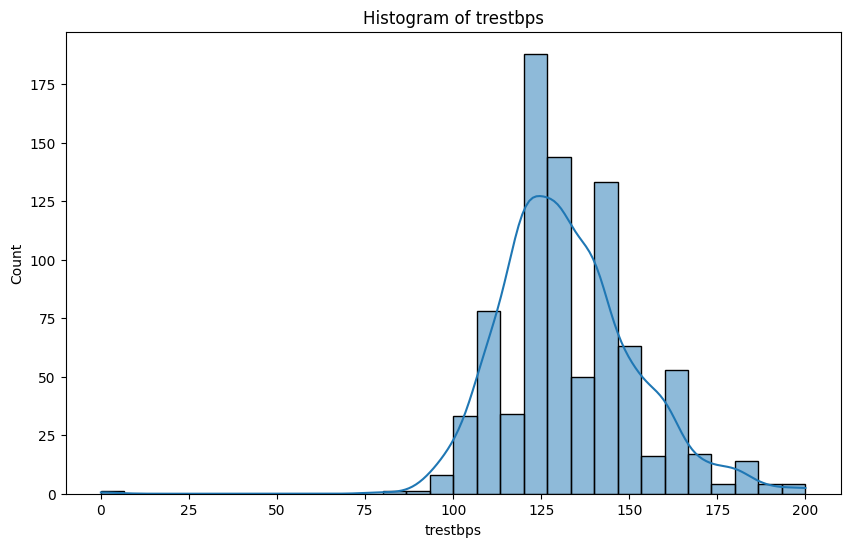

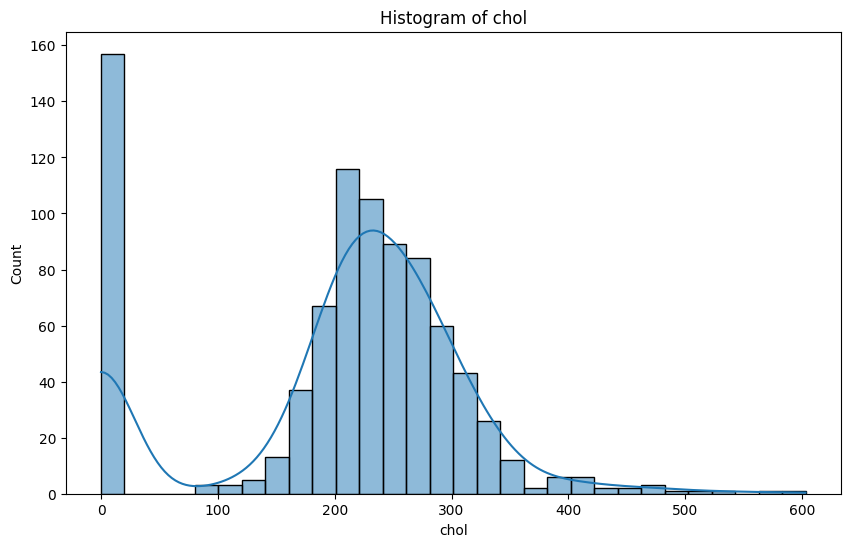

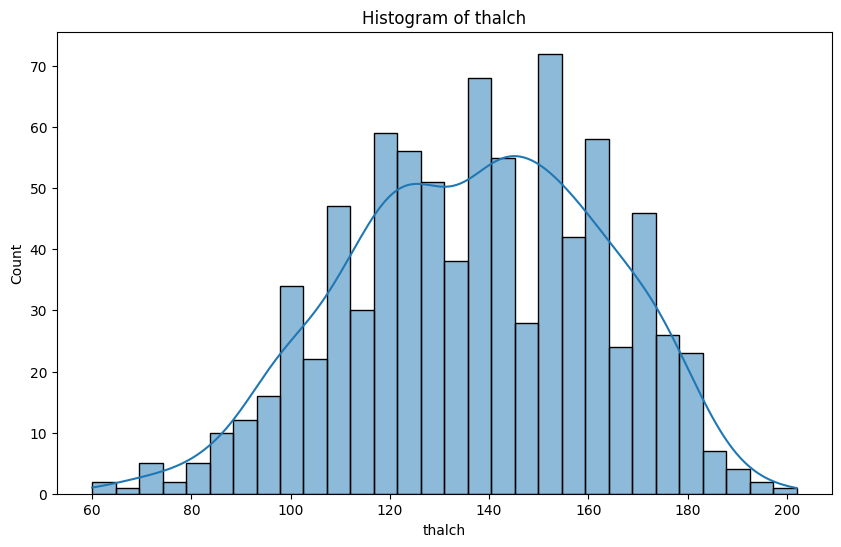

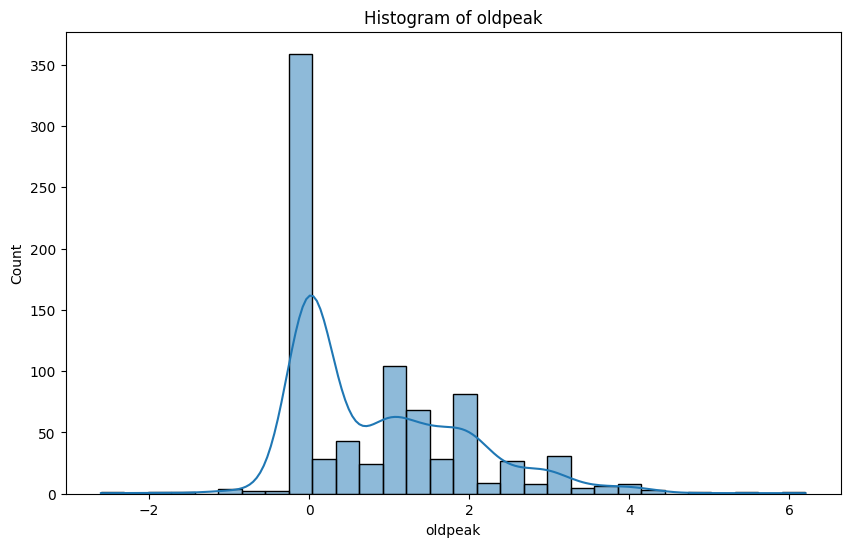

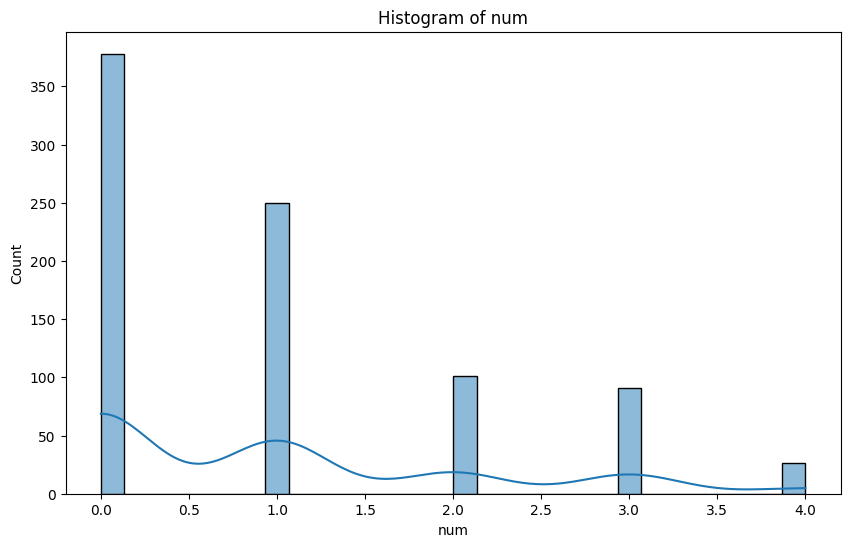

In [ ]:
# Histograms for numerical features

for column in numerical_columns.columns:
  plt.figure(figsize=(10,6))
  sns.histplot(df[column],bins=30,kde=True)
  plt.title(f"Histogram of {column}")
  plt.show()

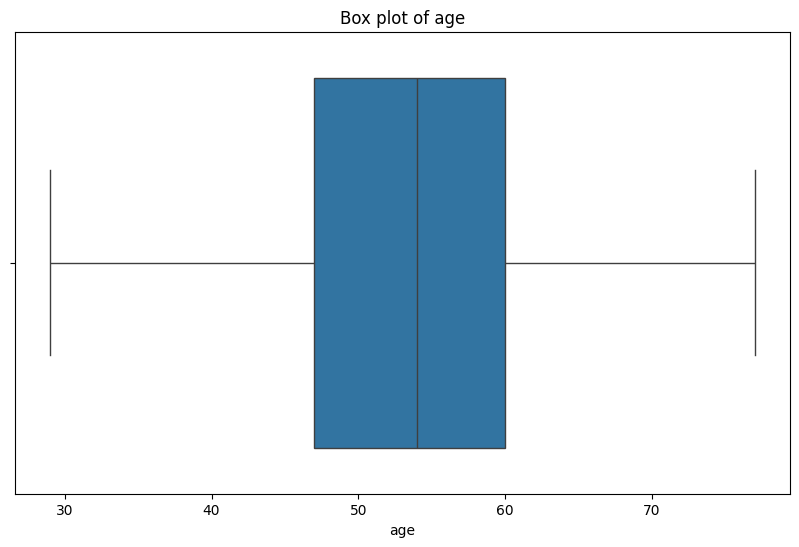

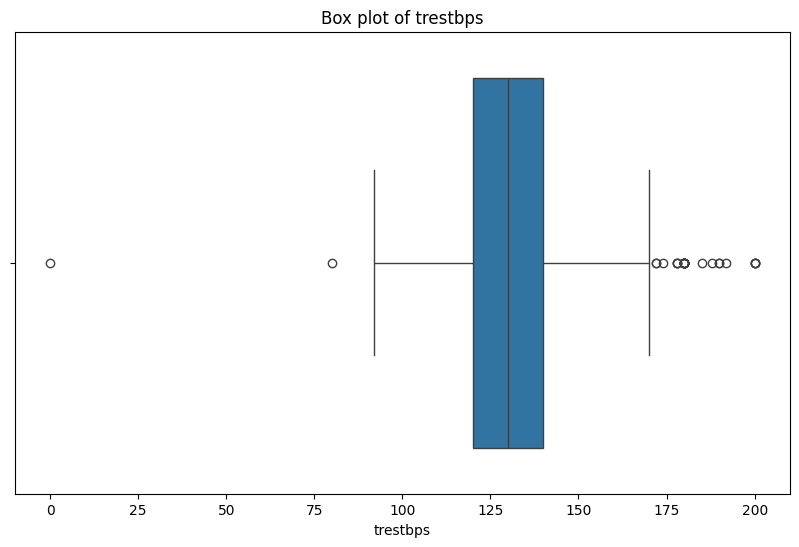

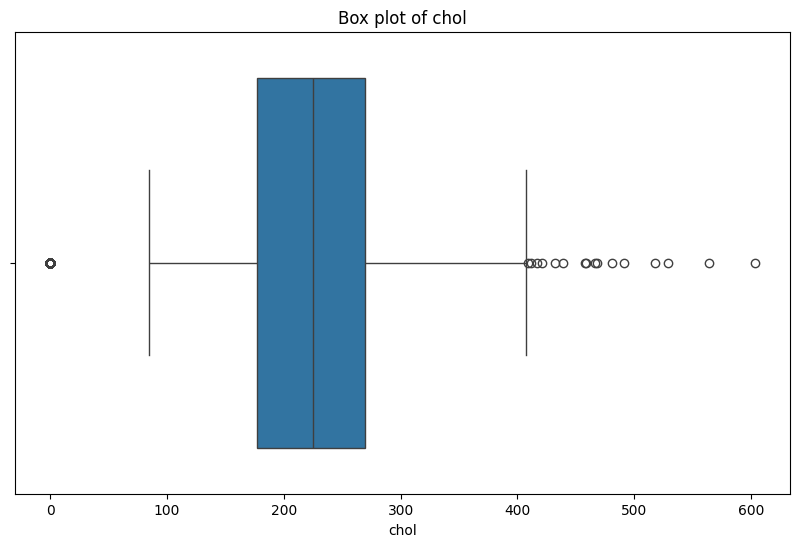

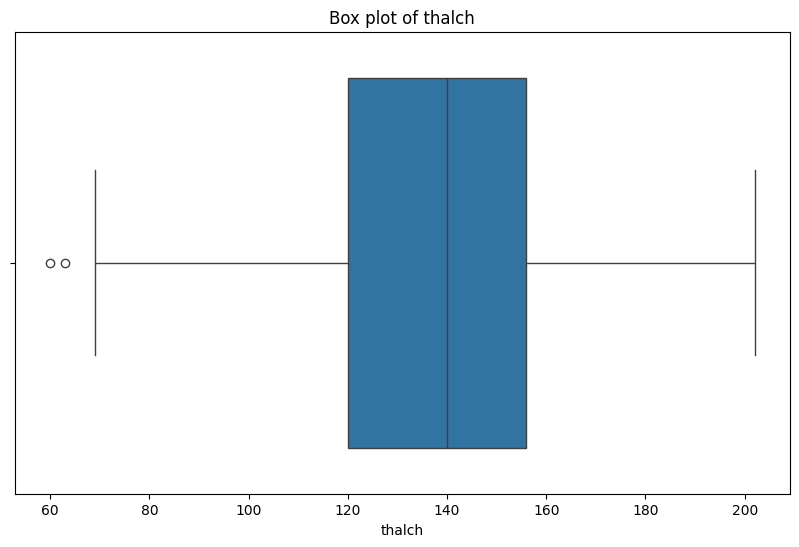

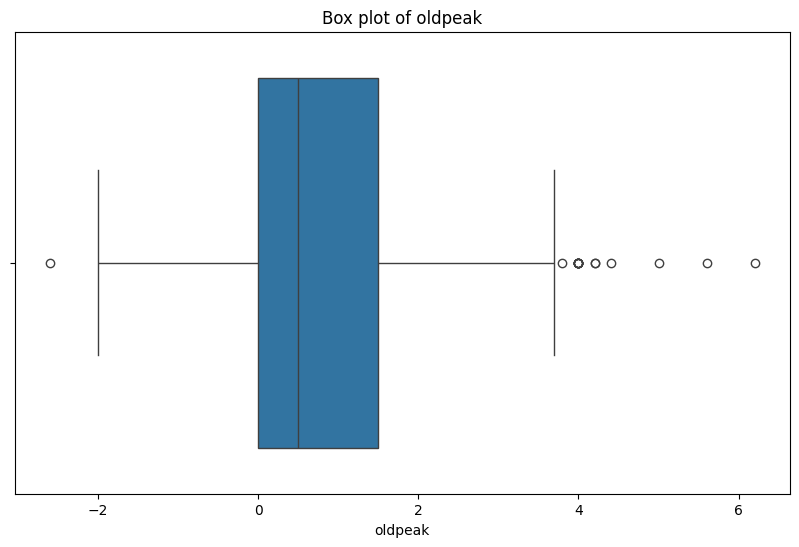

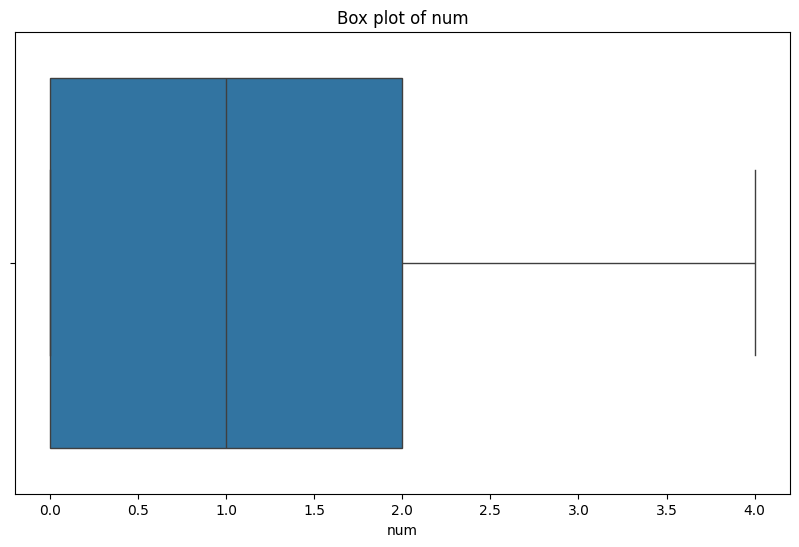

In [ ]:
# Box plots for each numerical features

for column in numerical_columns.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[column])
  plt.title(f"Box plot of {column}")
  plt.show()

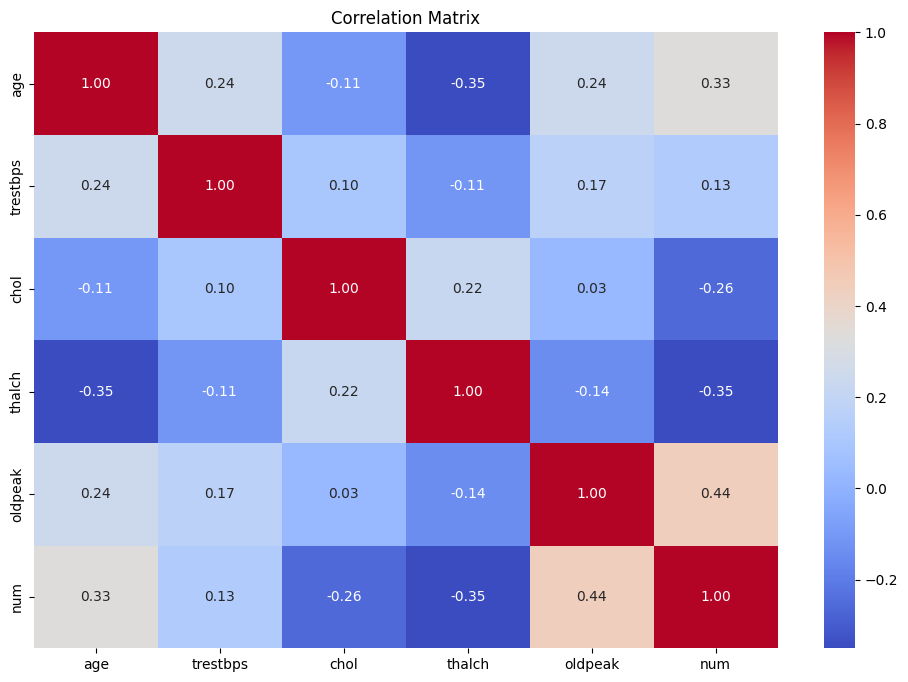

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

####Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).



In [ ]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
# Split tha data into features(x) and target variable (y)
x=df.drop(['sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal','num'],axis=1)
y=df['age']

In [ ]:
# Split the data into training and testing sets
# training=80%
# test=20%
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x,y

(     age
 0     63
 1     41
 2     57
 3     52
 4     57
 ..   ...
 901   51
 902   62
 903   53
 904   62
 905   56
 
 [846 rows x 1 columns],
 0      63
 1      41
 2      57
 3      52
 4      57
        ..
 901    51
 902    62
 903    53
 904    62
 905    56
 Name: age, Length: 846, dtype: int64)

In [ ]:
#Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn import tree
classifier_DT = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predicting the test set result
y_pred1 = classifier_DT.predict(x_test)
y_pred1

array([41, 56, 42, 44, 63, 53, 53, 50, 50, 45, 63, 58, 59, 59, 57, 68, 41,
       52, 43, 51, 56, 50, 61, 54, 52, 55, 58, 56, 61, 50, 52, 65, 57, 62,
       50, 50, 48, 61, 43, 64, 54, 44, 47, 66, 68, 51, 59, 46, 58, 67, 57,
       47, 58, 47, 66, 49, 47, 65, 67, 40, 59, 52, 59, 53, 42, 47, 37, 55,
       51, 49, 55, 64, 39, 54, 54, 52, 55, 57, 46, 62, 43, 53, 69, 53, 51,
       50, 62, 50, 49, 57, 53, 60, 40, 43, 51, 57, 64, 41, 62, 41, 54, 54,
       53, 48, 45, 53, 59, 56, 35, 54, 58, 55, 55, 66, 46, 32, 55, 64, 58,
       46, 45, 60, 50, 53, 75, 58, 52, 40, 67, 61, 71, 66, 69, 58, 51, 56,
       62, 39, 39, 42, 58, 54, 59, 58, 34, 42, 54, 60, 51, 52, 56, 51, 56,
       52, 49, 56, 43, 48, 45, 64, 52, 60, 64, 55, 37, 59, 57, 53, 70, 48])

In [ ]:
# Creating the Confusion matrix
cm = confusion_matrix(y_test,y_pred1)
clr = classification_report(y_test,y_pred1)
print(clr)

              precision    recall  f1-score   support

          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          34       1.00      1.00      1.00         1
          35       1.00      1.00      1.00         1
          37       1.00      1.00      1.00         2
          39       1.00      1.00      1.00         3
          40       1.00      1.00      1.00         3
          41       1.00      1.00      1.00         4
          42       1.00      1.00      1.00         4
          43       1.00      1.00      1.00         5
          44       1.00      1.00      1.00         2
          45       1.00      1.00      1.00         4
          46       1.00      1.00      1.00         4
          47       1.00      1.00      1.00         5
          48       1.00      1.00      1.00         4
          49       1.00      1.00      1.00         4
          50       1.00      1.00      1.00         9
          51       1.00    

####Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model.Experiment with different hyperparameters such as maximum depth,minimum samples split,and criterion.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=classifier_DT, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)


###Model Evaluation and Analysis:

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [ ]:
# Calculate metrics
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

Accuracy: 0.9941176470588236
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
               precision    recall  f1-score   support

          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          34       1.00      1.00      1.00         1
          35       1.00      1.00      1.00         1
          37       1.00      1.00      1.00         2
          39       1.00      1.00      1.00         3
          40       1.00      1.00      1.00         3
          41       1.00      1.00      1.00         4
          42       1.00      1.00      1.00         4
          43       1.00      1.00      1.00         5
          44       1.00      1.00      1.00         2
          45       1.00      1.00      1.00         4
          46       1.00      1.00      1.00         4
          47       1.00      1.00      1.00        

[Text(0.4979967948717949, 0.95, 'x[0] <= 54.5\nentropy = 5.193\nsamples = 676\nvalue = [1.0, 1.0, 2.0, 2.0, 3.0, 6.0, 6.0, 9.0, 15.0, 12.0\n10.0, 20.0, 14.0, 19.0, 17.0, 13.0, 20.0, 14.0, 26.0\n17.0, 15.0, 22.0, 26.0, 22.0, 39.0, 28.0, 27.0, 30.0\n30.0, 27.0, 25.0, 24.0, 25.0, 24.0, 14.0, 14.0, 9.0\n11.0, 7.0, 6.0, 6.0, 3.0, 3.0, 1.0, 5.0, 2.0, 2.0\n2.0]'),
 Text(0.34975961538461536, 0.85, 'x[0] <= 46.5\nentropy = 4.308\nsamples = 351\nvalue = [1.0, 1.0, 2.0, 2.0, 3.0, 6.0, 6.0, 9.0, 15.0, 12.0\n10.0, 20.0, 14.0, 19.0, 17.0, 13.0, 20.0, 14.0, 26.0\n17.0, 15.0, 22.0, 26.0, 22.0, 39.0, 0.0, 0.0, 0.0\n0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]'),
 Text(0.4238782051282051, 0.8999999999999999, 'True  '),
 Text(0.24439102564102563, 0.75, 'x[0] <= 41.5\nentropy = 3.717\nsamples = 170\nvalue = [1.0, 1.0, 2.0, 2.0, 3.0, 6.0, 6.0, 9.0, 15.0, 12.0\n10.0, 20.0, 14.0, 19.0, 17.0, 13.0, 20.0, 0.0, 0.0\n0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

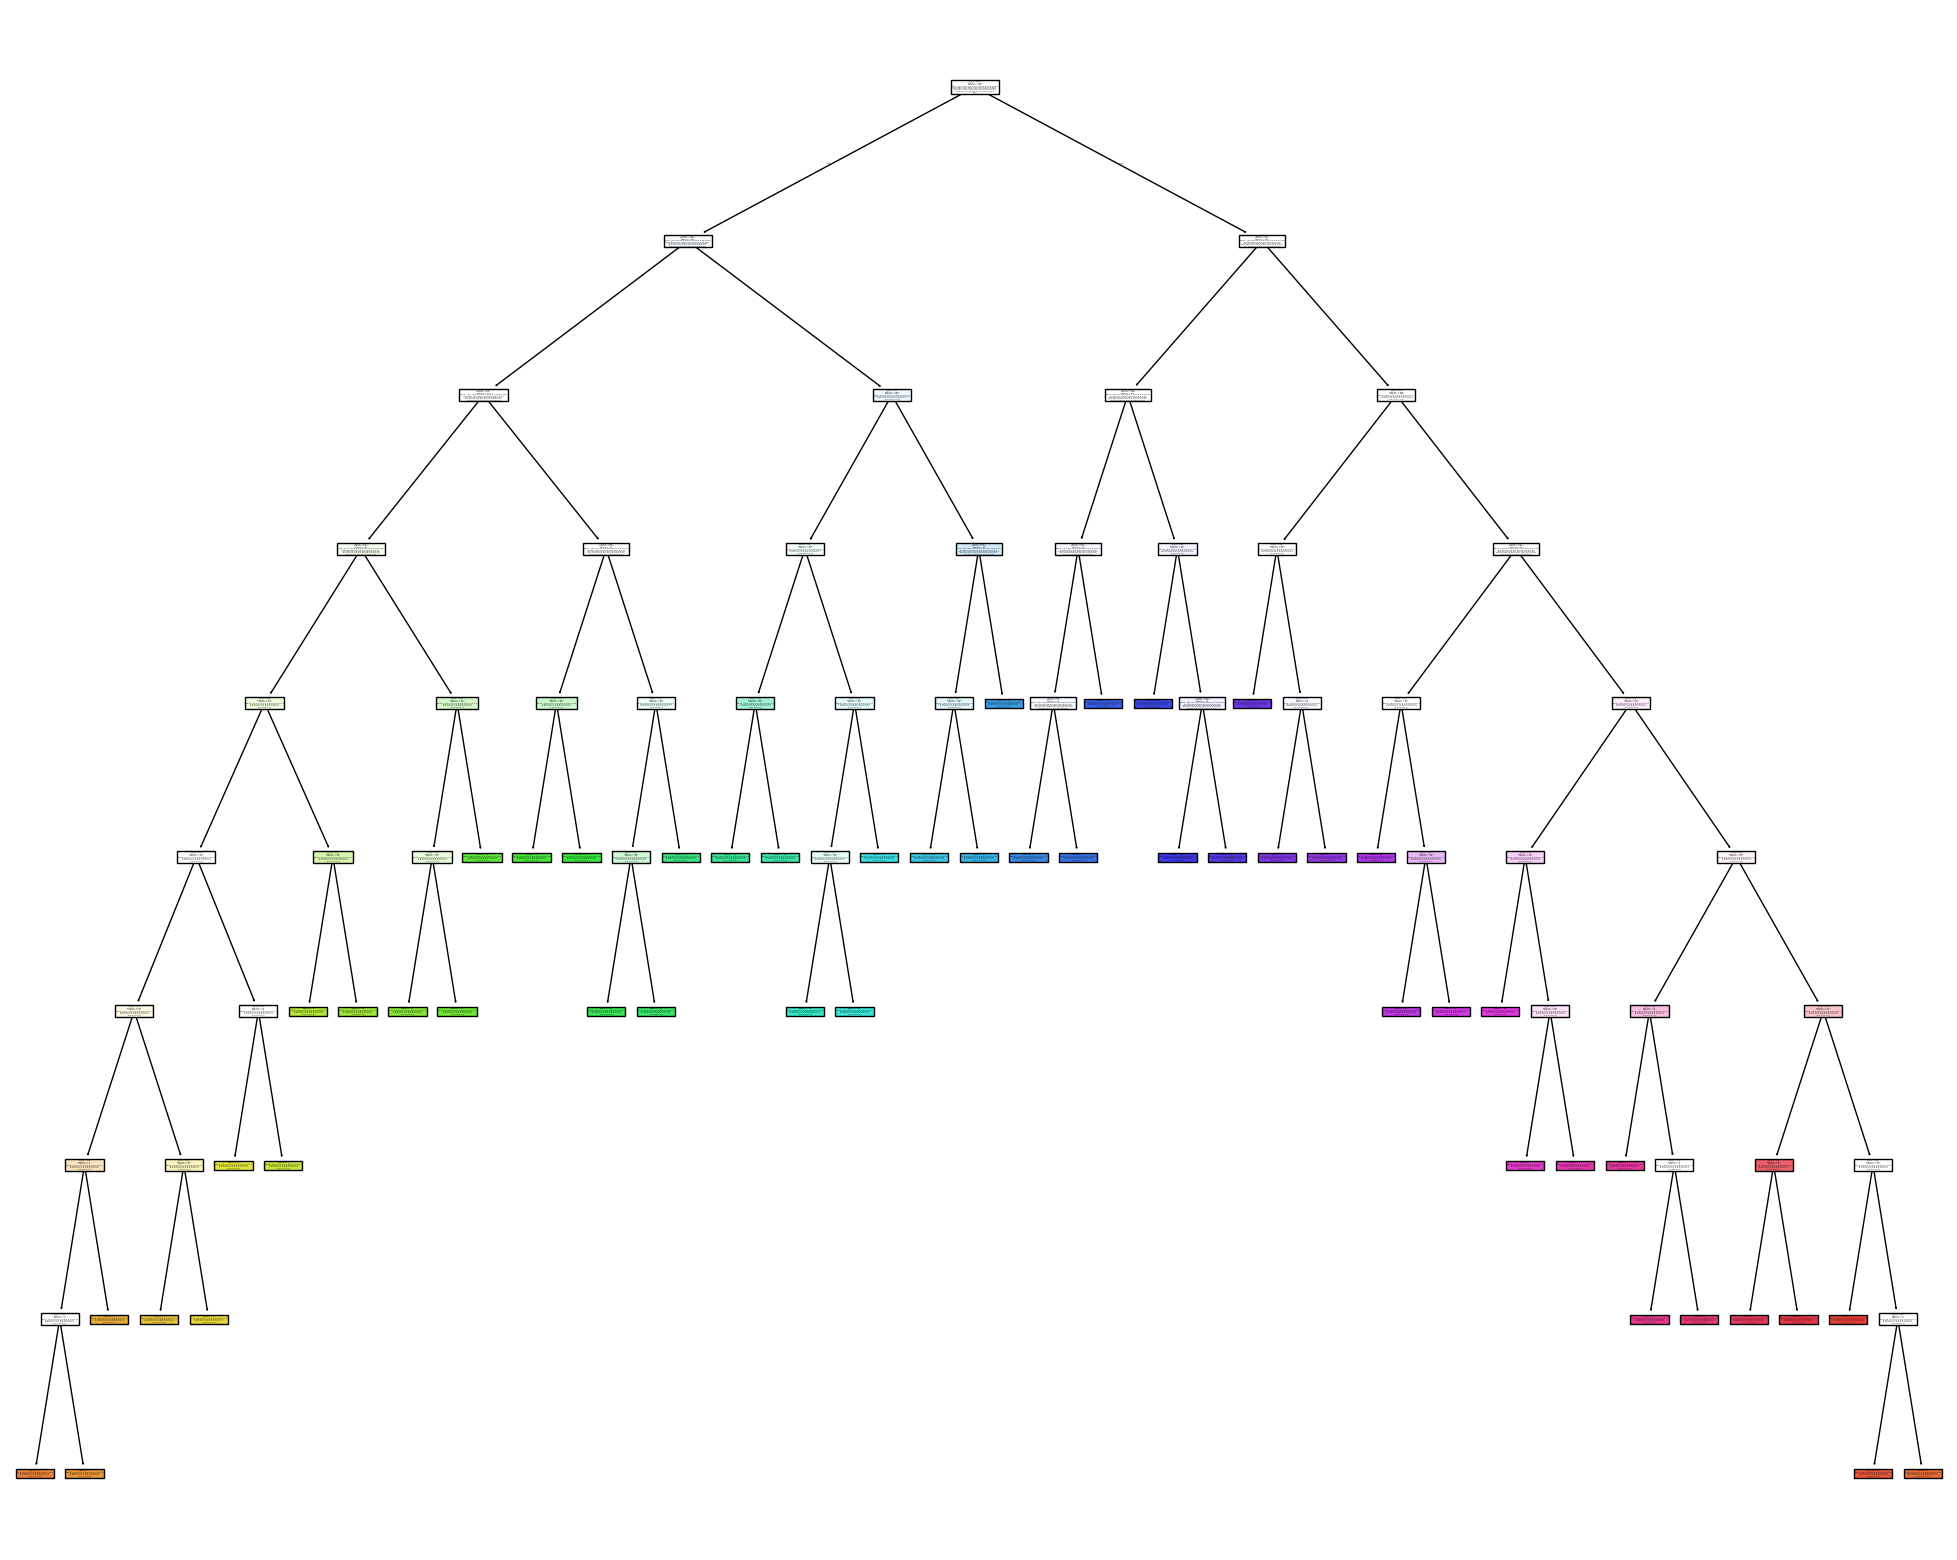

In [ ]:
# Plot decision tree
fig = plt.figure(figsize=(25,20))
plot_tree(classifier_DT,filled = True)

Interview Questions:


1.What are some common hyperparameters of decision tree models,and how do they affect the models performance?

Decision trees are powerful and flexible models,and tuning their hyperparameters can significantly impact their performance and behavior.
Some of the common hyperparameters for decision tree model are max_depth,min_samples_split,min_samples_leaf,etc..

2.What is the difference between the Label encoding and One-hot encoding?

Label encoding and one-hot encoding  are both techniques used to connect categorical daata into a numerical format that machine learning algorith,s can understand.However,they work differently and are suitable for different types of categorical variables.

--> Label encoding assigns a unique integer to each category in a categorical variable.It works well for ordinal categorical variables,where there is a natural order or ranking among the categories.

--> One-hot encoding creates binary columns for each category in a categorical variable.It works well for nominal categorical variables,where there is no inherent order among the categories.